# TP3

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances 

In [4]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

# Plus Proche Voisin

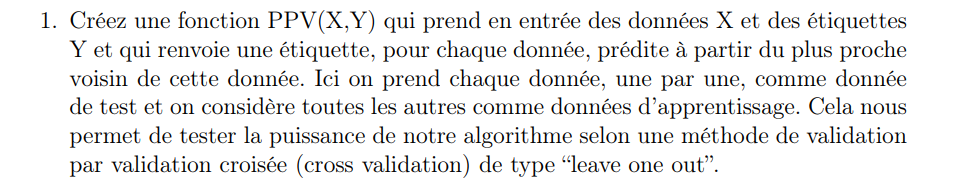

In [8]:
def PPV_1(X,Y):
    predictions = []
    for i in range(0,len(X)):
        new_X = np.delete(X,i,0)
        new_y = np.delete(y,i,0)
        distances = []
        
        for j in new_X:
            distances.append(euclidean_distances([j],[X[i]]))
            
        indice = distances.index(min(distances))
        predictions.append(new_y[indice])
        
    return predictions

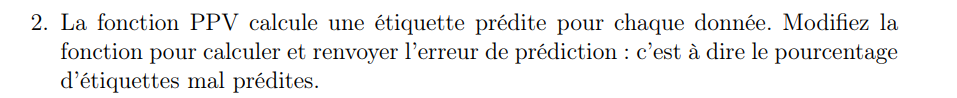

In [25]:
def PPV_2(X,Y):
    
    predictions = []
    similarite=0
    for i in range(0,len(X)):
        new_X = np.delete(X,i,0)
        new_y = np.delete(y,i,0)
        distances = []
        
        for j in new_X:
            distances.append(euclidean_distances([j],[X[i]]))
            
        indice = distances.index(min(distances))
        predictions.append(new_y[indice])
        
        if predictions[i] == Y[i]:
            similarite += 1
    erreur=f"{(1 - similarite/len(X))*100} %"
    return (predictions , erreur)

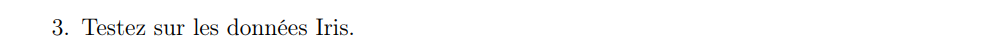

In [13]:
predictions = PPV_1(iris.data , iris.target)
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [35]:
predictions_2 , err = PPV_2(iris.data ,iris.target ) 
print(predictions_2)
print("\nle pourcentage d'étiquettes mals prédites : " ,err)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

le pourcentage d’étiquettes male prédites :  4.0000000000000036 %


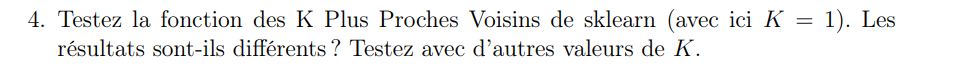

In [39]:
def KNN_sklearn(x,y):
    predictions = []
    similarite = 0
    for i in range(len(x)):
        new_X = np.delete(x,i,0)
        new_Y = np.delete(y,i,0)
        
        KNN = KNeighborsClassifier(n_neighbors=3)
        KNN = KNN.fit(new_X,new_Y)
        predictions.append(KNN.predict( [x[i]] ).item() )
        
        if predictions[i] == y[i]:
            similarite += 1
            
    erreur=f"{(1 - similarite/len(x))*100} %"
    return (predictions , erreur)

In [40]:
predictions_3 , err2 = KNN_sklearn(iris.data , iris.target)
print(predictions_3,"\n")
print("le pourcentage d'étiquettes mals prédites : " ,err2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

le pourcentage d’étiquettes male prédites :  4.0000000000000036 %


# NB:On remrque que les pourcentages d’étiquettes males prédites des deux méthodes sont similaires 

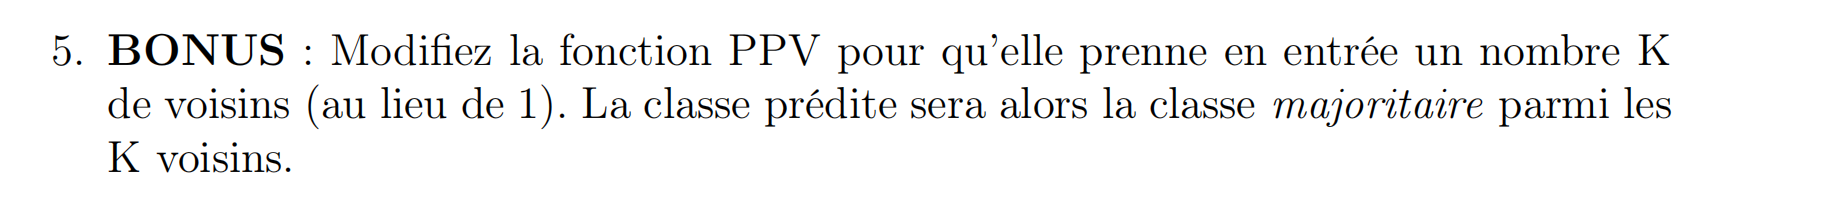

In [44]:
def K_PPV(X,Y,k):
    predictions = []
    similarite = 0
    for i in range(len(X)):
        new_X = np.delete(X,i,0)
        new_y = np.delete(Y,i,0)
        distances  = []
        for j in new_X:
            distances.append( euclidean_distances([j],[X[i]]).item() )
        
        indices = np.argsort(distances) 
        
        clusters = [ Y[indice] for indice in indices[:k]] 
        Nbre_Ocurrence = [clusters.count(cluster) for cluster in clusters]
        
        predictions.append(clusters[ np.argmax(Nbre_Ocurrence)].item() )
        
        if predictions[i] == Y[i]:
            similarite += 1
        
    erreur=f"{(1 - similarite/len(X))*100} %"
    return (predictions , erreur)

In [49]:
predictions_4 , err3 = K_PPV(iris.data , iris.target ,5)
print(predictions_4,"\n")
print("le pourcentage d'étiquettes mals prédites :",err3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

le pourcentage d'étiquettes mals prédites : 3.3333333333333326 %


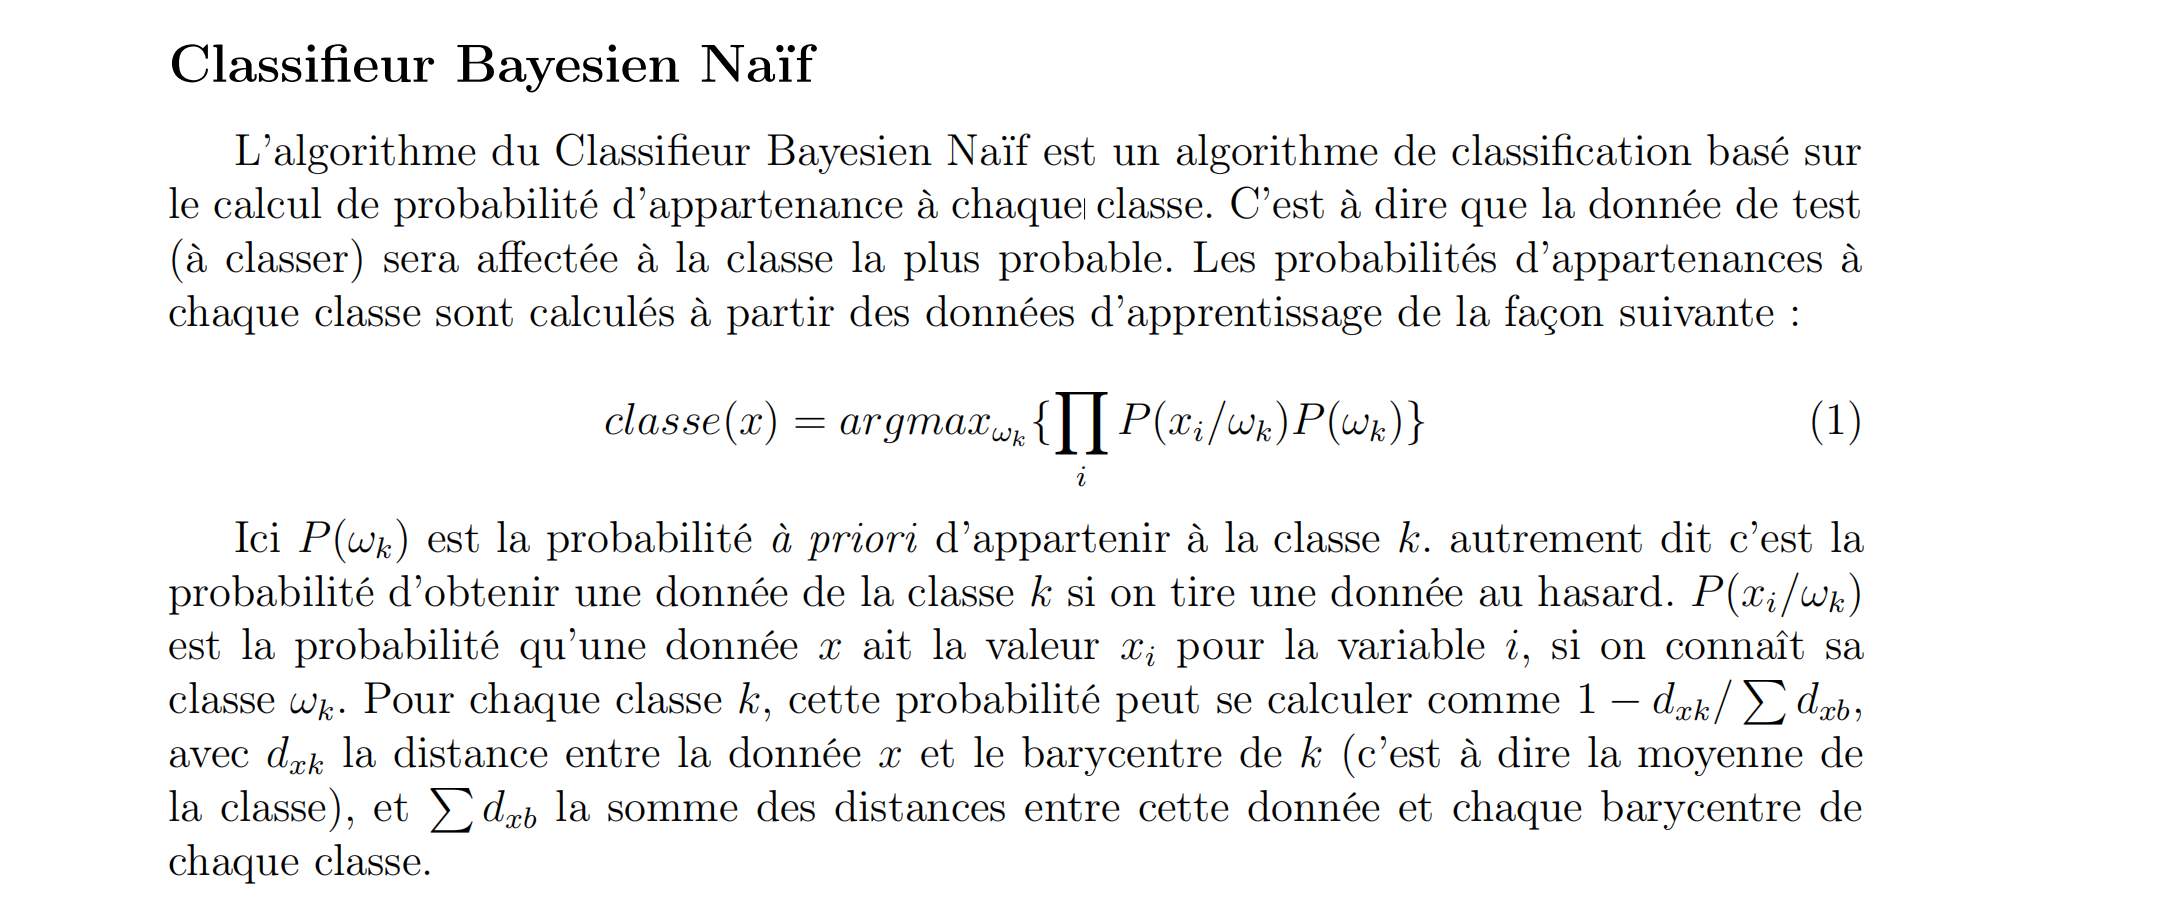

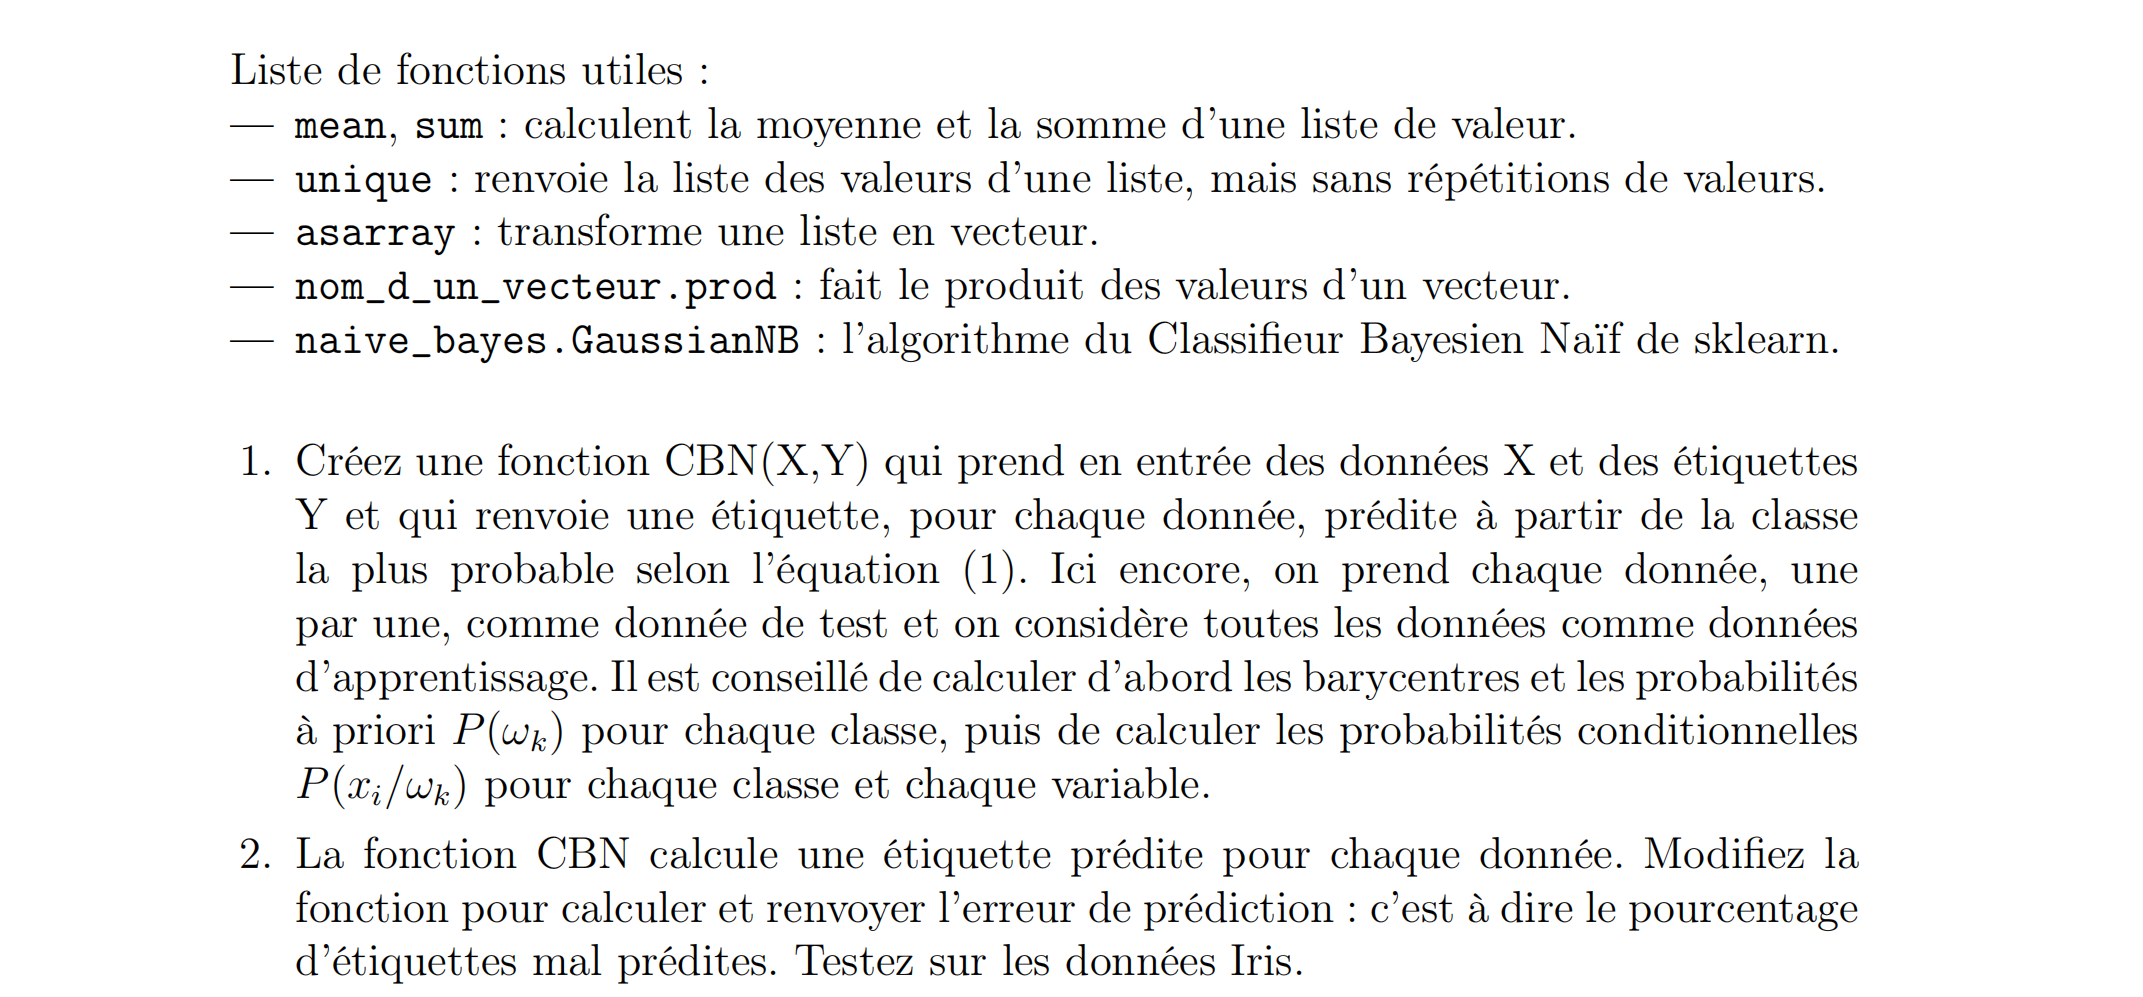

In [52]:
def CBN(x,y):
    predictions = []
    similarite = 0
    for i in range(0,len(x)):
        new_X  = np.delete(x,i,0)
        new_y  = np.delete(y,i,0)
        
        # Clacule des barycentres et les distances dxk
        Dxks = [ euclidean_distances( [x[i]] , [new_X[new_y == target].mean(0)] )  for target in np.unique(new_y) ]
        #la somme Dxb
        somme_Dxb =  np.sum(Dxks)
        proba_condition = [ (1 - dxk/somme_Dxb) for dxk in Dxks ]
        
        #Calcule des P(w) et des sorties finales
        sortie = [ proba_condition[target] * ( len(new_X[new_y == target]) / len(x) )  for target in np.unique(new_y) ]
        predictions.append(np.argmax(sortie))
        
        if predictions[i] == y[i]:
            similarite += 1
        
        
    erreur=f"{(1 - similarite/len(x))*100} %"
    return (predictions , erreur)
    

In [53]:
predictionsCBN , errCBN = CBN(iris.data ,iris.target)
print(predictionsCBN,"\n")
print("le pourcentage d'étiquettes mals prédites pour CBN :",errCBN)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2] 

le pourcentage d'étiquettes mals prédites pour CBN : 10.666666666666668 %


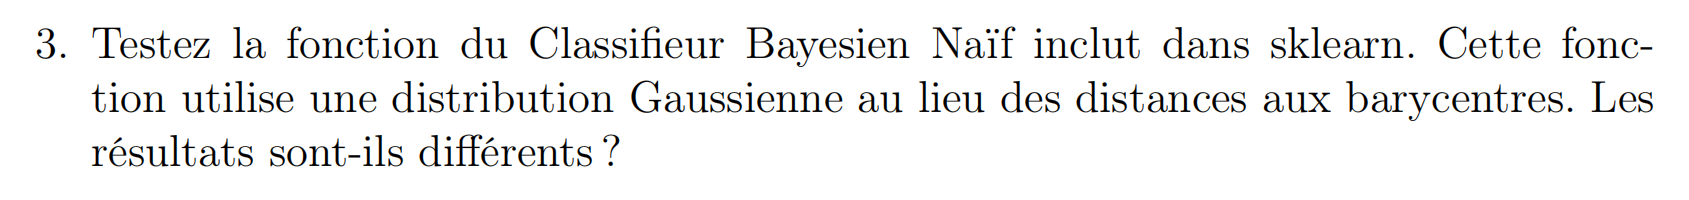

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
def CBN_Sklearn(x,y):
    predictions = []
    similarite = 0
    for i in range(0,len(x)):
        new_X  = np.delete(x,i,0)
        new_y  = np.delete(y,i,0)
        
        NB = GaussianNB()
        NB_fit = NB.fit(new_X, new_y)
        predictions.append(NB_fit.predict([x[i]]).item())
        
        if predictions[i] == y[i]:
            similarite += 1
        
        
    erreur=f"{(1 - similarite/len(x))*100} %"
    return (predictions , erreur)

In [59]:
predictionsCBN_Sklearn , errCBN_Sklearn = CBN_Sklearn(iris.data ,iris.target)
print(predictionsCBN_Sklearn,"\n")
print("le pourcentage d'étiquettes mals prédites pour CBN_sklearn :",errCBN_Sklearn)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

le pourcentage d'étiquettes mals prédites pour CBN_sklearn : 4.666666666666663 %
